In [ ]:
# Importando as bibliotecas que serão utilizadas na análise exploratória de dados:

!pip3 install geopandas;

import json

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
# Fazendo o download do dado bruto em um arquivo no formato json, e atribuindo o nome de 'deliveries.json':

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json


In [ ]:
# Carregando os dados do arquivo em um dicionário Python chamado 'data':

with open('deliveries.json', mode='r', encoding='utf8') as fp:
  data = json.load(fp)

In [ ]:
len(data)

199

In [ ]:
# Fazendo a exploração inicial do dado:

dado_inicial = data[0]
dado_inicial

{'name': 'cvrp-2-df-33',
 'region': 'df-2',
 'origin': {'lng': -48.05498915846707, 'lat': -15.83814451122274},
 'vehicle_capacity': 180,
 'deliveries': [{'id': '313483a19d2f8d65cd5024c8d215cfbd',
   'point': {'lng': -48.11618888384239, 'lat': -15.848929154862294},
   'size': 9},
  {'id': '320c94b17aa685c939b3f3244c3099de',
   'point': {'lng': -48.11819489551, 'lat': -15.850772371049631},
   'size': 2},
  {'id': '3663b42f4b8decb33059febaba46d5c8',
   'point': {'lng': -48.11248339849675, 'lat': -15.84787055941764},
   'size': 1},
  {'id': 'e11ab58363c38d6abc90d5fba87b7d7',
   'point': {'lng': -48.11802268617869, 'lat': -15.846471025281456},
   'size': 2},
  {'id': '54cb45b7bbbd4e34e7150900f92d7f4b',
   'point': {'lng': -48.114898174591026, 'lat': -15.85805462185708},
   'size': 7},
  {'id': '71271df40c3188cda88266f9969a5a9',
   'point': {'lng': -48.120447632397045, 'lat': -15.8477803198514},
   'size': 10},
  {'id': 'be0cd4bee278b16f3473c8fb05e96464',
   'point': {'lng': -48.121801874785

In [ ]:
dado_inicial.keys()

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])

In [ ]:
dado_inicial['name']

'cvrp-2-df-33'

In [ ]:
dado_inicial['region']

'df-2'

In [ ]:
dado_inicial['origin']['lng']

-48.05498915846707

In [ ]:
dado_inicial['origin']['lat']

-15.83814451122274

In [ ]:
dado_inicial['vehicle_capacity']

180

In [ ]:
dado_inicial['deliveries'][0]['point']['lat']

-15.848929154862294

In [ ]:
# Processo de Data Wrangling: Transformação e limpeza dos dados brutos em um formato adequado para a análise dos dados:

deliveries_df = pd.DataFrame(data)

In [ ]:
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
# Normalização dos dados aninhados no DataFrame com a operação flatten, transformando as estruturas de 'chave: valor' em colunas:

hub_origin_df = pd.json_normalize(deliveries_df['origin'])
hub_origin_df.head()

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


In [ ]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, left_index=True, right_index=True, how='inner')
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


In [ ]:
# Retirando a coluna 'origin', renomeando as colunas 'lng' e 'lat', e colocando as colunas do DataFrame em ordem:

deliveries_df = deliveries_df.drop('origin', axis=1)
deliveries_df = deliveries_df[['name','region','lng','lat','vehicle_capacity','deliveries']]
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
deliveries_df.rename(columns={'lng': 'hub_lng', 'lat': 'hub_lat'}, inplace=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
# Normalizando os dados da coluna 'deliveries' através da operação explode, e depois separando os dados das linhas, e ordenando as colunas atrávés do método concat:

deliveries_exploded_df = deliveries_df[['deliveries']].explode('deliveries')
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [ ]:
deliveries_normalized_df = pd.concat([
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda coluna: coluna['size'])).rename(columns={'deliveries': 'delivery_size'}),
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda coluna: coluna['point']['lat'])).rename(columns={'deliveries': 'delivery_lat'}),
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda coluna: coluna['point']['lng'])).rename(columns={'deliveries': 'delivery_lng'}),
], axis=1)
deliveries_normalized_df.head()

,delivery_size,delivery_lat,delivery_lng
0,9,-15.848929,-48.116189
0,2,-15.850772,-48.118195
0,1,-15.847871,-48.112483
0,2,-15.846471,-48.118023
0,7,-15.858055,-48.114898


In [ ]:
len(deliveries_normalized_df)


636149

In [ ]:
len(deliveries_df)

199

In [ ]:
# Combinando os dados com o conjunto de dados principal:

deliveries_df = deliveries_df.drop('deliveries', axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lat,delivery_lng
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-15.848929,-48.116189
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-15.850772,-48.118195
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-15.847871,-48.112483
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-15.846471,-48.118023
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-15.858055,-48.114898


In [ ]:
len(deliveries_df)

636149

In [ ]:
# Analisando a estrutura do conjunto de dados:

deliveries_df.shape


(636149, 8)

In [ ]:
deliveries_df.columns

Index(['name', 'region', 'hub_lng', 'hub_lat', 'vehicle_capacity',
       'delivery_size', 'delivery_lat', 'delivery_lng'],
      dtype='object')

In [ ]:
deliveries_df.index

RangeIndex(start=0, stop=636149, step=1)

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lat      636149 non-null  float64
 7   delivery_lng      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


In [ ]:
# Exploração do Schema:

deliveries_df.head(n=10)

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lat,delivery_lng
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-15.848929,-48.116189
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-15.850772,-48.118195
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-15.847871,-48.112483
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-15.846471,-48.118023
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-15.858055,-48.114898
5,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,10,-15.847780,-48.120448
6,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-15.852089,-48.121802
7,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,10,-15.851215,-48.116300
8,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-15.849660,-48.116317
9,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,8,-15.849925,-48.123115


In [ ]:
deliveries_df.dtypes

name                 object
region               object
hub_lng             float64
hub_lat             float64
vehicle_capacity      int64
delivery_size         int64
delivery_lat        float64
delivery_lng        float64
dtype: object

In [ ]:
deliveries_df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708


In [ ]:
deliveries_df.drop(['name','region'], axis=1).select_dtypes('int64').describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


In [ ]:
# Verificando se existem dados faltantes nas colunas do DataFrame:

deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
vehicle_capacity    False
delivery_size       False
delivery_lat        False
delivery_lng        False
dtype: bool

In [ ]:
# Enriquecendo nossos dados através da geocodificação reversa:

hub_df = deliveries_df[['region','hub_lng','hub_lat']]
hub_df = hub_df.drop_duplicates().sort_values(by='region').reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


In [ ]:
geolocator = Nominatim(user_agent='jaquesson_oliveira')
location = geolocator.reverse('-15.657013854445248, -47.802664728268745')

print(json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 46410411,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656916027876347",
  "lon": "-47.80264463632131",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.10000999999999993,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-202, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "stat

In [ ]:
# Aplicando a geocodificação nas coordenadas das três regiões, e extraindo informações relevantes para a análise:

geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [ ]:
hub_df['coordinates'] = hub_df['hub_lat'].astype(str) + ', ' + hub_df['hub_lng'].astype(str)
hub_df['geodata'] = hub_df['coordinates'].apply(geocoder)
hub_df.head()


,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [ ]:
hub_geodata_df = pd.json_normalize(hub_df['geodata'].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.00001,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [ ]:
hub_geodata_df.columns

Index(['place_id', 'licence', 'osm_type', 'osm_id', 'lat', 'lon', 'class',
       'type', 'place_rank', 'importance', 'addresstype', 'name',
       'display_name', 'boundingbox', 'address.road', 'address.residential',
       'address.suburb', 'address.town', 'address.municipality',
       'address.county', 'address.state_district', 'address.state',
       'address.ISO3166-2-lvl4', 'address.region', 'address.postcode',
       'address.country', 'address.country_code', 'address.neighbourhood',
       'address.city', 'address.shop', 'address.house_number'],
      dtype='object')

In [ ]:
hub_geodata_df = hub_geodata_df[['address.town', 'address.suburb', 'address.city']]
hub_geodata_df.rename(columns={'address.town':'hub_town', 'address.suburb':'hub_suburb', 'address.city':'hub_city'}, inplace=True)
hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
hub_geodata_df['hub_suburb'] = np.where(hub_geodata_df['hub_suburb'].notna(), hub_geodata_df['hub_suburb'], hub_geodata_df['hub_city'])
hub_geodata_df = hub_geodata_df.drop('hub_town', axis=1)
hub_geodata_df.head()

<ipython-input-40-41629321d558>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df.rename(columns={'address.town':'hub_town', 'address.suburb':'hub_suburb', 'address.city':'hub_city'}, inplace=True)
<ipython-input-40-41629321d558>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
<ipython-input-40-41629321d558>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


In [ ]:
# Combinando o DataFrame 'hub_geodata_df' com as informações de cidade e bairro, com o dataFrame principal 'deliveries_df':

hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[['region','hub_suburb','hub_city']]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [ ]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_df, how='inner', on='region')
deliveries_df = deliveries_df[['name', 'region', 'hub_lng', 'hub_lat', 'hub_city', 'hub_suburb', 'vehicle_capacity', 'delivery_size', 'delivery_lng', 'delivery_lat']]
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


In [ ]:
# Aplicando a geocalização reversa nas coordenadas de entrega:

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv


In [ ]:
deliveries_geodata_df = pd.read_csv('deliveries-geodata.csv')
deliveries_geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [ ]:
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_geodata_df[['delivery_city','delivery_suburb']], how='inner', left_index=True, right_index=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [ ]:
# Verificando se os dados adicionados ao DataFrame são relevantes para a exploração dos dados:

deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 79.2+ MB


In [ ]:
deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
hub_city            False
hub_suburb          False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city        True
delivery_suburb      True
dtype: bool

In [ ]:
100 * (deliveries_df['delivery_city'].isna().sum() / len(deliveries_df))

0.26754738276724477

In [ ]:
100 * (deliveries_df['delivery_suburb'].isna().sum() / len(deliveries_df))

25.133262804783158

In [ ]:
prop_df = deliveries_df[['delivery_city']].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_city       
Brasília                0.234195
Taguatinga              0.071625
Sudoeste / Octogonal    0.069504
Ceilândia               0.059661
Águas Claras            0.058293
Guará                   0.055619
Lago Sul                0.045620
Sobradinho              0.045412
Lago Norte              0.040832
Gama                    0.034880
dtype: float64

In [ ]:
prop_df = deliveries_df[['delivery_suburb']].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)


delivery_suburb 
Brasília            0.084564
Asa Norte           0.076639
Taguatinga          0.063363
Asa Sul             0.059263
Águas Claras        0.056598
Guará               0.055619
Samambaia           0.026514
Sobradinho          0.018148
Recanto das Emas    0.015029
P Sul               0.012807
dtype: float64

In [ ]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

In [ ]:
mapa = geopandas.read_file('distrito-federal.shp')
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


In [ ]:
#Criando um novo DataFrame com através do 'deliveries_df', adicionando uma coluna com os pontos dos hubs:

hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df["hub_lng"], hub_df["hub_lat"]))
geo_hub_df.head()

,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


In [ ]:
#Criando um novo DataFrame com através do 'deliveries_df', adicionando uma coluna com os pontos das entregas:

geo_deliveries_df = geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df["delivery_lng"], deliveries_df["delivery_lat"]))
geo_deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


<ipython-input-56-9aeeaca83852>:23: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


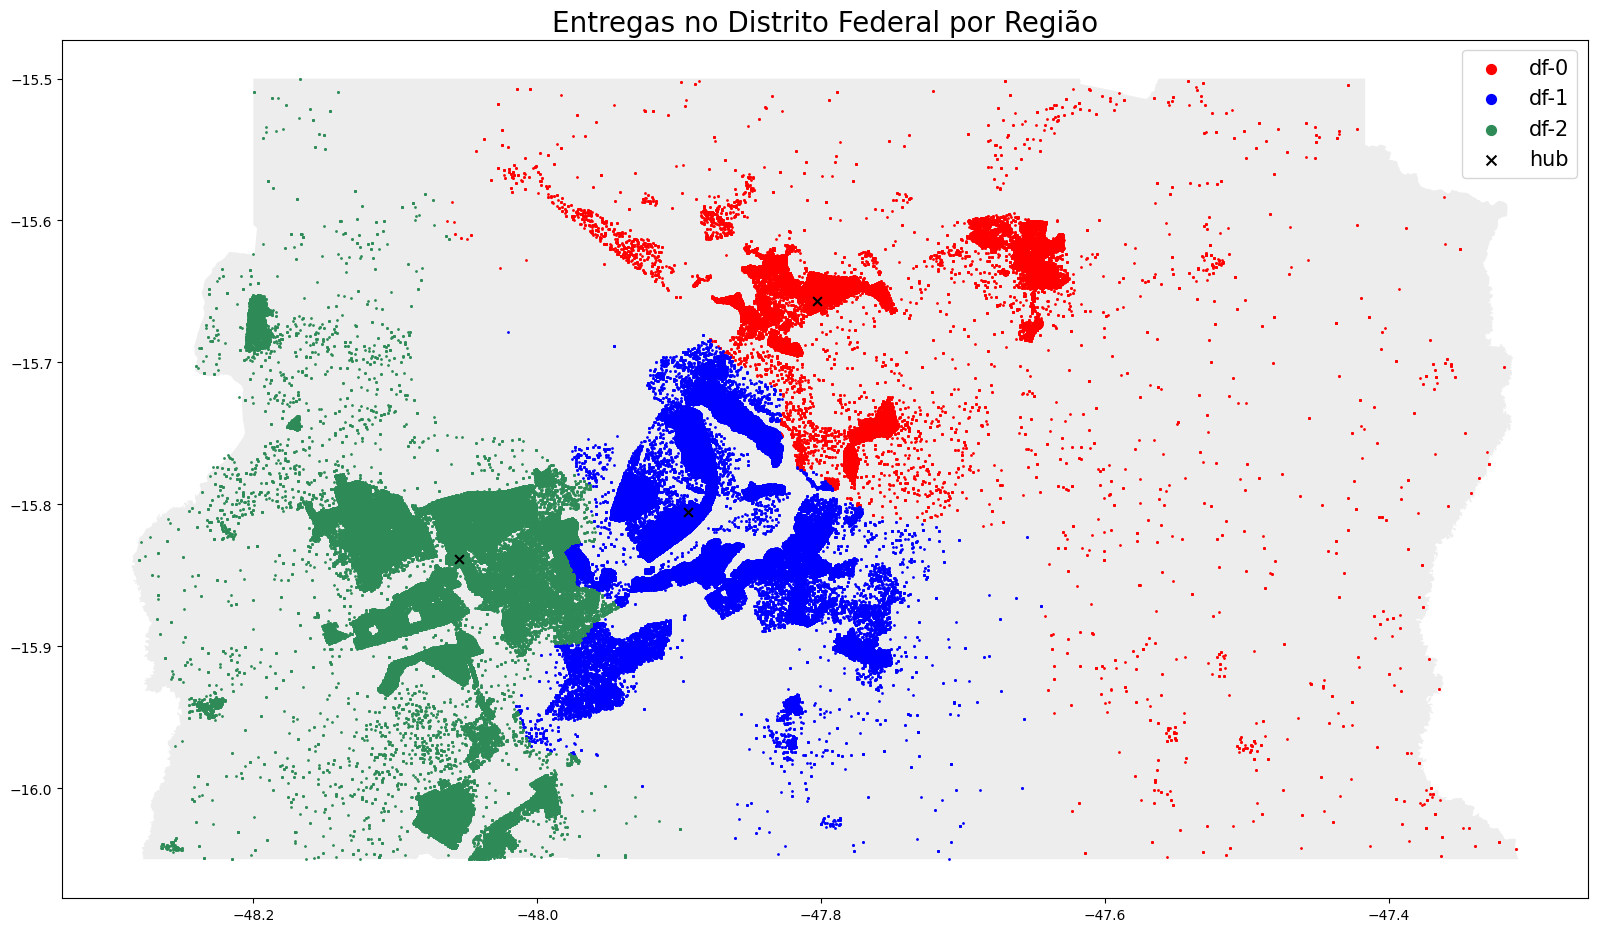

In [ ]:
# Criando um plot vazio para plotar os gráficos:

fig, ax = plt.subplots(figsize = (50/2.54, 50/2.54))

# Plot mapa do distrito federal:

mapa.plot(ax=ax, alpha=0.4, color="lightgrey")

# Plot das entregas:

geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color="red", label="df-0")
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color="blue", label="df-1")
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color="seagreen", label="df-2")

# Plot dos hubs:

geo_hub_df.plot(ax=ax, markersize=40, marker="x", color="black", label="hub")

# Plot da legenda:

plt.title("Entregas no Distrito Federal por Região", fontdict={"fontsize": 20})
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

In [ ]:
# Criando um DataFrame para gerar um gráfico de porcentagem de entregas por região, comparado a capacidade de veículos:

data = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True)).reset_index()
data.rename(columns={0: "region_percent"}, inplace=True)
data.head()

,region,vehicle_capacity,region_percent
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


<ipython-input-58-dc7638004e72>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=data, x="region", y="region_percent", ci=None, palette="pastel", order=['df-0','df-1','df-2'])
<ipython-input-58-dc7638004e72>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=data, x="region", y="region_percent", ci=None, palette="pastel", order=['df-0','df-1','df-2'])


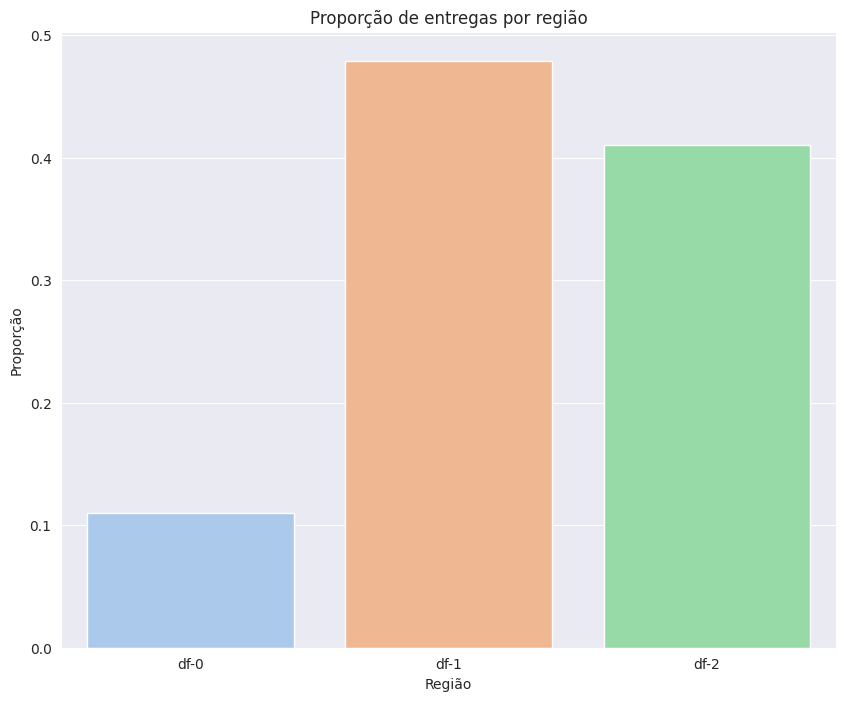

In [ ]:
#Gerando o gráfico:

with sns.axes_style('darkgrid'):
  plt.figure(figsize=(10,8))
  grafico = sns.barplot(data=data, x="region", y="region_percent", ci=None, palette="pastel", order=['df-0','df-1','df-2'])
  grafico.set(title='Proporção de entregas por região', xlabel='Região', ylabel='Proporção');

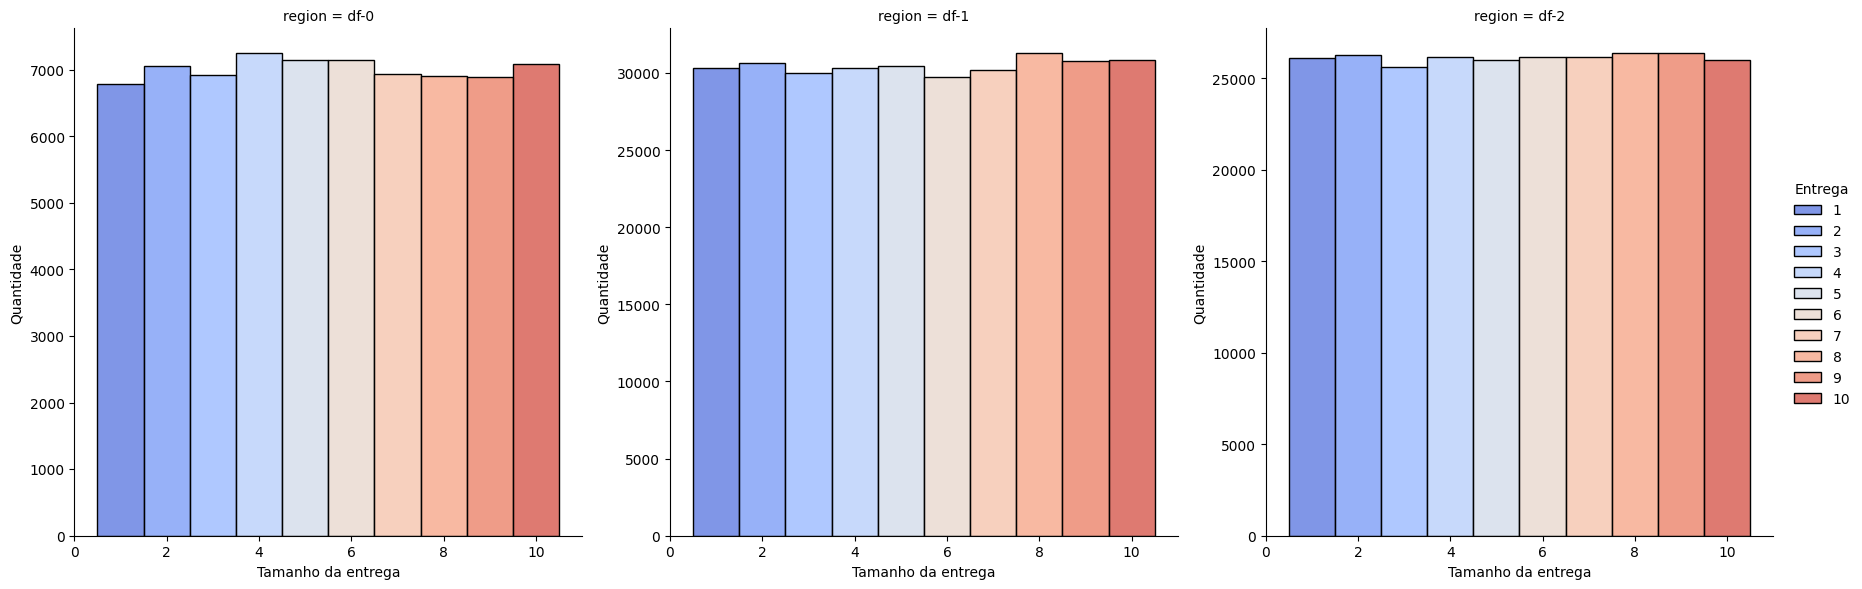

In [ ]:
# Gerando um gráfico de proporção (quantidade x tamanho da entrega) por região:

g = sns.FacetGrid(geo_deliveries_df, height= 6, col='region', col_wrap=3, hue='delivery_size', sharey=False, col_order=['df-0','df-1','df-2'], palette="coolwarm")

g.map(sns.histplot, 'delivery_size')
g.add_legend(title='Entrega')
g.set(xlabel='Tamanho da entrega', ylabel='Quantidade')
sns.set(rc={"figure.figsize": (8,6), "axes.labelsize": 16})

Insights:
Analisando o posicionamento dos hubs, a distribuição das entregas no mapa, e a proporção de entregas por região no gráfico de barras, vemos que a maioria das entregas está concentrada nos hubs df-1 e df-2, e que a distância entre os endereços de entrega e os hubs, é bem menor comparado ao hub df-0. Em contrapartida, apesar de o hub df-0 ter o menor número de entregas comparado aos demais, a distância entre o hub e os endereços de entrega é muito maior, o que consequentemente demanda mais tempo nas entregas, e dificuldades no trajeto, justificando o menor número de entregas, apesar de possuir a mesma capacidade de veículos que os demais. Através do Histograma, vemos que em todas as regiões, o tamanho (unidade de peso ou volume, não especificado nos dados) da entrega comparado a quantidade é muito parecido, e através desses dados, podemos alocar as entregas nos veículos adequados, de acordo com tamanho, distância, podendo poupar tempo, gasto com combustível, e manutenção de veículos.